# Tutorial - Step1 : MTMR pretraining with Metric learning

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from MTMR.vae import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "qed"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_2-1_{PROPERTY_NAME.upper()}_pretraining"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [7]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [8]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [9]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [12]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [13]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 3.403  loss_recon_src(tr): 3.403  loss_recon_tar(tr): 3.403  loss_recon_neg(tr): 3.403  loss_contractive(tr): 0.445  loss_margin(tr): 1.963  beta: 0.000  gamma: 0.000  valid_ratio(va): 0.589  similarity(va): 0.005
[00001000/00100000]  loss(tr): 0.662  loss_recon_src(tr): 0.666  loss_recon_tar(tr): 0.603  loss_recon_neg(tr): 0.610  loss_contractive(tr): 1.609  loss_margin(tr): 0.238  beta: 0.020  gamma: 0.020  valid_ratio(va): 0.953  similarity(va): 0.142
[00002000/00100000]  loss(tr): 0.534  loss_recon_src(tr): 0.499  loss_recon_tar(tr): 0.403  loss_recon_neg(tr): 0.481  loss_contractive(tr): 1.400  loss_margin(tr): 0.368  beta: 0.040  gamma: 0.040  valid_ratio(va): 0.992  similarity(va): 0.172
[00003000/00100000]  loss(tr): 0.480  loss_recon_src(tr): 0.430  loss_recon_tar(tr): 0.317  loss_recon_neg(tr): 0.388  loss_contractive(tr): 1.337  loss_margin(tr): 0.339  beta: 0.060  gamma: 0.060  valid_ratio(va): 0.994  similarity(va): 0.197
[00004000/00100000] 

[00034000/00100000]  loss(tr): 0.701  loss_recon_src(tr): 0.137  loss_recon_tar(tr): 0.056  loss_recon_neg(tr): 0.117  loss_contractive(tr): 0.580  loss_margin(tr): 0.298  beta: 0.680  gamma: 0.680  valid_ratio(va): 0.997  similarity(va): 0.393
[00035000/00100000]  loss(tr): 0.774  loss_recon_src(tr): 0.117  loss_recon_tar(tr): 0.059  loss_recon_neg(tr): 0.126  loss_contractive(tr): 0.599  loss_margin(tr): 0.359  beta: 0.700  gamma: 0.700  valid_ratio(va): 1.000  similarity(va): 0.373
[00036000/00100000]  loss(tr): 0.656  loss_recon_src(tr): 0.140  loss_recon_tar(tr): 0.059  loss_recon_neg(tr): 0.103  loss_contractive(tr): 0.532  loss_margin(tr): 0.238  beta: 0.720  gamma: 0.720  valid_ratio(va): 0.994  similarity(va): 0.372
[00037000/00100000]  loss(tr): 0.755  loss_recon_src(tr): 0.126  loss_recon_tar(tr): 0.062  loss_recon_neg(tr): 0.115  loss_contractive(tr): 0.518  loss_margin(tr): 0.363  beta: 0.740  gamma: 0.740  valid_ratio(va): 0.994  similarity(va): 0.376
[00038000/00100000] 

[00068000/00100000]  loss(tr): 0.918  loss_recon_src(tr): 0.110  loss_recon_tar(tr): 0.043  loss_recon_neg(tr): 0.064  loss_contractive(tr): 0.605  loss_margin(tr): 0.242  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.997  similarity(va): 0.423
[00069000/00100000]  loss(tr): 0.803  loss_recon_src(tr): 0.122  loss_recon_tar(tr): 0.068  loss_recon_neg(tr): 0.087  loss_contractive(tr): 0.434  loss_margin(tr): 0.277  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.384
[00070000/00100000]  loss(tr): 0.829  loss_recon_src(tr): 0.130  loss_recon_tar(tr): 0.060  loss_recon_neg(tr): 0.096  loss_contractive(tr): 0.469  loss_margin(tr): 0.264  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.994  similarity(va): 0.392
[00071000/00100000]  loss(tr): 0.777  loss_recon_src(tr): 0.123  loss_recon_tar(tr): 0.055  loss_recon_neg(tr): 0.096  loss_contractive(tr): 0.460  loss_margin(tr): 0.225  beta: 1.000  gamma: 1.000  valid_ratio(va): 0.994  similarity(va): 0.409
[00072000/00100000] 

## 9. Visualize for loss analysis

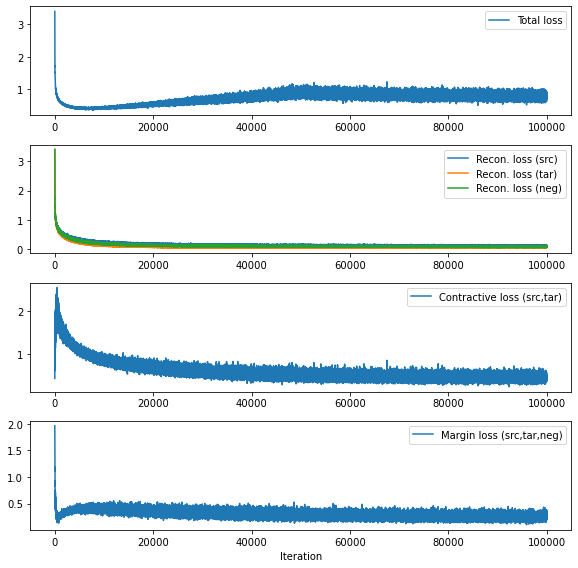

In [14]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_CONTRACTIVE"], label="Contractive loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_MARGIN"], label="Margin loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

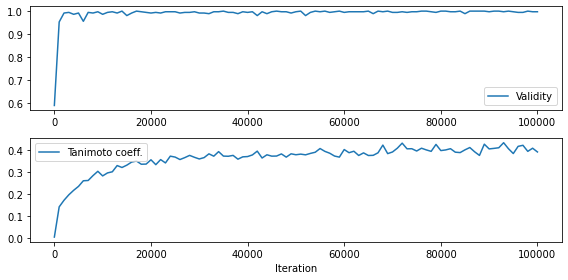

In [15]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()